In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight as cw
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply

Using TensorFlow backend.


### Imbalanced 


In [2]:
df= pd.read_csv('test17.csv')

In [3]:
df = df
df = df.dropna()
df.isna().sum()
df = df[["text","Sentiment"]]

In [4]:
X = df.text
Y = df.Sentiment
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)

In [5]:
max_words = len(set(" ".join(X).split()))
max_len = X.apply(lambda x: len(x)).max()

In [6]:
max_words, max_len

(16434, 162)

In [7]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [20]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())    
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 100)           1643400   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 1024)          308224    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 1,954,699
Trainable params: 1,954,699
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
verbose = 1
epochs = 10
batch_size = 110
validation_split = 0.2
history1 = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_split=validation_split)

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4827 samples, validate on 1207 samples
Epoch 1/10
4827/4827 [==============================] - 12s 2ms/step - loss: 0.7410 - accuracy: 0.7454 - val_loss: 0.6171 - val_accuracy: 0.7589
Epoch 2/10
4827/4827 [==============================] - 11s 2ms/step - loss: 0.4871 - accuracy: 0.7964 - val_loss: 0.5289 - val_accuracy: 0.7904
Epoch 3/10
4827/4827 [==============================] - 12s 2ms/step - loss: 0.2568 - accuracy: 0.9117 - val_loss: 0.5439 - val_accuracy: 0.8103
Epoch 4/10
4827/4827 [==============================] - 11s 2ms/step - loss: 0.0948 - accuracy: 0.9743 - val_loss: 0.6203 - val_accuracy: 0.8136
Epoch 5/10
4827/4827 [==============================] - 11s 2ms/step - loss: 0.0349 - accuracy: 0.9911 - val_loss: 0.7096 - val_accuracy: 0.8078
Epoch 6/10
4827/4827 [==============================] - 12s 2ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.7590 - val_accuracy: 0.8086
Epoch 7/10
4827/4827 [==============================] - 13s 3ms/step - loss: 0.014

In [16]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss',fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

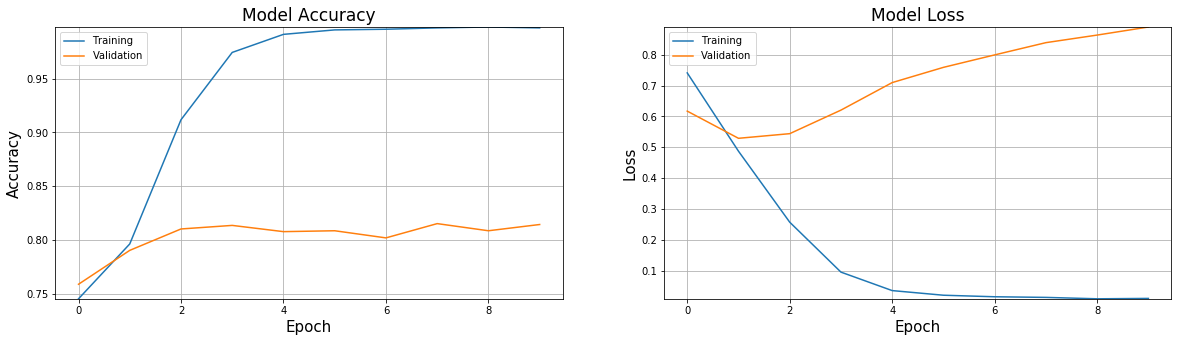

In [22]:
plot_performance(history=history1)

In [13]:
accuracy = model.evaluate(X_test, Y_test)

2587/2587 [==============================] - 1s 293us/step


In [14]:
print("\nModel Performance of CNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy[1]*100, accuracy[0]))


Model Performance of CNN (Test Accuracy):
v: 79.90%
Loss: 0.868



### Balanced

In [23]:
df= pd.read_csv('test17.csv')

In [24]:
df = df
df = df.dropna()
df.isna().sum()
df = df[["text","Sentiment"]]

In [25]:
X = df.text
Y = df.Sentiment
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)

In [26]:
max_words = len(set(" ".join(X).split()))
max_len = X.apply(lambda x: len(x)).max()

In [27]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_train_seq = tokenizer.texts_to_sequences(X)
X_train_seq = pad_sequences(X_train_seq)

In [28]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()

In [29]:
X,Y= os.fit_sample(X_train_seq, Y)

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
embed_dim = 128

model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())    
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 24, 100)           1643400   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 22, 1024)          308224    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 1,954,699
Trainable params: 1,954,699
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
verbose = 1
epochs = 10
batch_size = 120
validation_split = 0.2

In [33]:
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current
class_weight = get_weight(Y_train.flatten())

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1], y=[0 1 0 ... 0 1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [34]:
history1 = model.fit(X_train,
                     Y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=verbose,
                     validation_split = validation_split,
                     class_weight = class_weight
                    )

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10884 samples, validate on 2721 samples
Epoch 1/10
10884/10884 [==============================] - 32s 3ms/step - loss: 0.7590 - accuracy: 0.6724 - val_loss: 0.3478 - val_accuracy: 0.8776
Epoch 2/10
10884/10884 [==============================] - 31s 3ms/step - loss: 0.1559 - accuracy: 0.9518 - val_loss: 0.1680 - val_accuracy: 0.9427
Epoch 3/10
10884/10884 [==============================] - 33s 3ms/step - loss: 0.0394 - accuracy: 0.9893 - val_loss: 0.1495 - val_accuracy: 0.9500
Epoch 4/10
10884/10884 [==============================] - 36s 3ms/step - loss: 0.0204 - accuracy: 0.9943 - val_loss: 0.1639 - val_accuracy: 0.9537
Epoch 5/10
10884/10884 [==============================] - 35s 3ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.1578 - val_accuracy: 0.9533
Epoch 6/10
10884/10884 [==============================] - 31s 3ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.1694 - val_accuracy: 0.9544
Epoch 7/10
10884/10884 [==============================] - 29s 3ms/ste

In [37]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss',fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

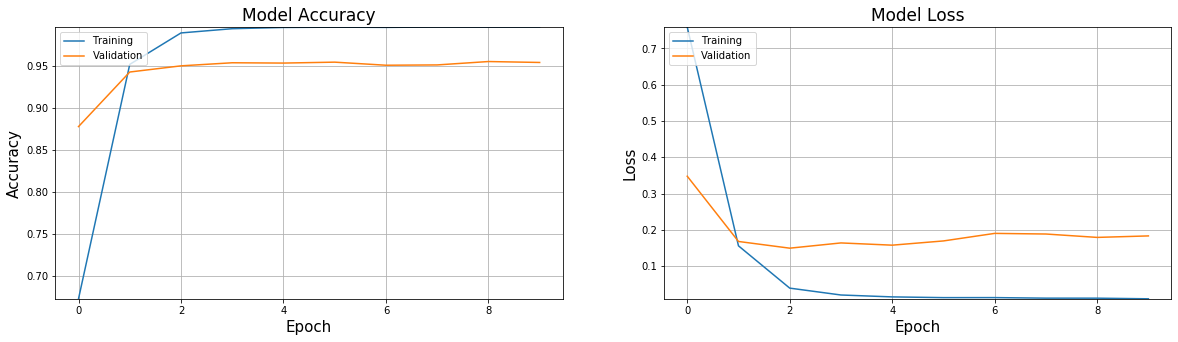

In [38]:
plot_performance(history=history1)

In [39]:
accuracy = model.evaluate(X_test, Y_test)

5832/5832 [==============================] - 2s 404us/step


In [40]:
print("\nModel Performance of CNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy[1]*100, accuracy[0]))


Model Performance of CNN (Test Accuracy):
v: 95.82%
Loss: 0.165

